In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка визуализации
plt.style.use('ggplot')
%matplotlib inline

# Загрузка данных
sales_df = pd.read_csv('sales_data.csv')

# 2. Первичный анализ данных
print("Вывод первых 5 строк")
display(sales_df.head()) 
print("Информация о столбцах и типах данных")
display(sales_df.info())  
print("Описание числовых столбцов")
display(sales_df.describe())  

Вывод первых 5 строк


,Date,Category,Product,Quantity,Price,Region
0,2023-01-05,Smartphones,Samsung Galaxy S21,2,54990,Center
1,2023-01-05,Accessories,iPhone Case,5,1200,South
2,2023-01-06,Laptops,HP Pavilion,1,62500,West
3,2023-01-07,Audio,Sony Headphones,3,4990,Center
4,2023-01-08,Smartphones,iPhone 13,2,79990,North


Информация о столбцах и типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      128 non-null    object
 1   Category  128 non-null    object
 2   Product   128 non-null    object
 3   Quantity  128 non-null    int64 
 4   Price     128 non-null    int64 
 5   Region    128 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.1+ KB


None

Описание числовых столбцов


,Quantity,Price
count,128.000000,128.000000
mean,4.929688,42491.796875
std,3.996423,34652.435449
min,1.000000,490.000000
25%,2.000000,4990.000000
50%,4.000000,32990.000000
75%,6.000000,69990.000000
max,25.000000,112990.000000


In [2]:
# 3. Подготовка данных
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['Price']

sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Weekday'] = sales_df['Date'].dt.day_name()

display(sales_df.head()) 

,Date,Category,Product,Quantity,Price,Region,Revenue,Month,Weekday
0,2023-01-05,Smartphones,Samsung Galaxy S21,2,54990,Center,109980,1,Thursday
1,2023-01-05,Accessories,iPhone Case,5,1200,South,6000,1,Thursday
2,2023-01-06,Laptops,HP Pavilion,1,62500,West,62500,1,Friday
3,2023-01-07,Audio,Sony Headphones,3,4990,Center,14970,1,Saturday
4,2023-01-08,Smartphones,iPhone 13,2,79990,North,159980,1,Sunday


In [9]:
# 4. Анализ по категориям
category_revenue = sales_df.groupby('Category')['Revenue'].sum().reset_index()
display(category_revenue)

,Category,Revenue
0,Accessories,257700
1,Audio,1321970
2,Laptops,4275700
3,Smartphones,7240510
4,TV,4319160


In [11]:
# 5. Анализ по месяцам
monthly_revenue = sales_df.groupby('Month')['Revenue'].sum().reset_index()
display(monthly_revenue)

,Month,Revenue
0,1,762000
1,2,874190
2,3,959840
3,4,1018570
4,5,1292090
5,6,1522410
6,7,1304460
7,8,1793510
8,9,1258470
9,10,2249450


In [13]:
# 6. Топ продуктов
top_products = sales_df.groupby('Product')['Quantity'].sum().nlargest(5).reset_index()
display(top_products)

,Product,Quantity
0,USB-C Cable,78
1,Screen Protector,63
2,Xiaomi Redmi Note 10,51
3,Samsung Galaxy S21,40
4,iPhone 13,37


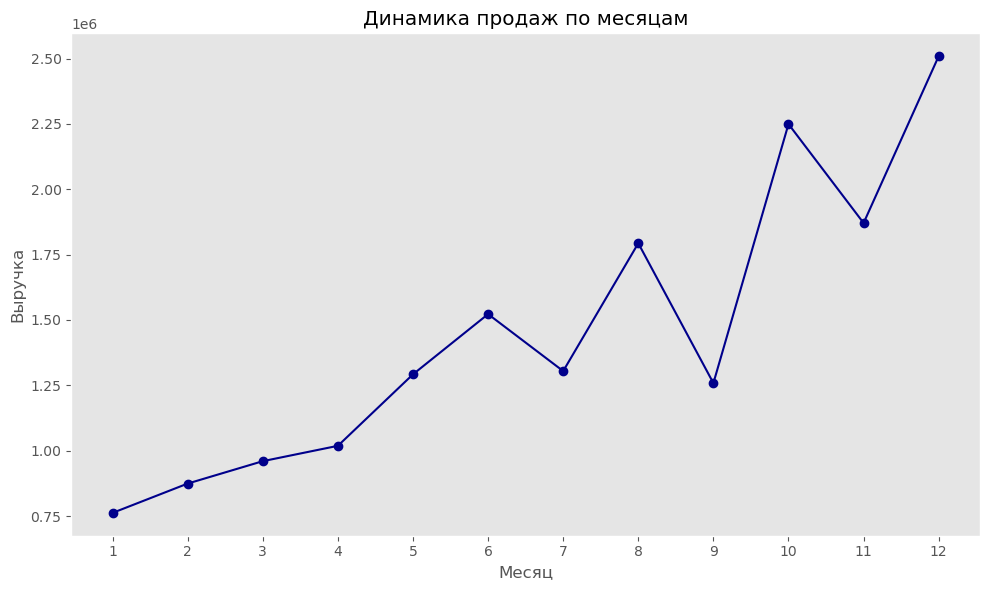

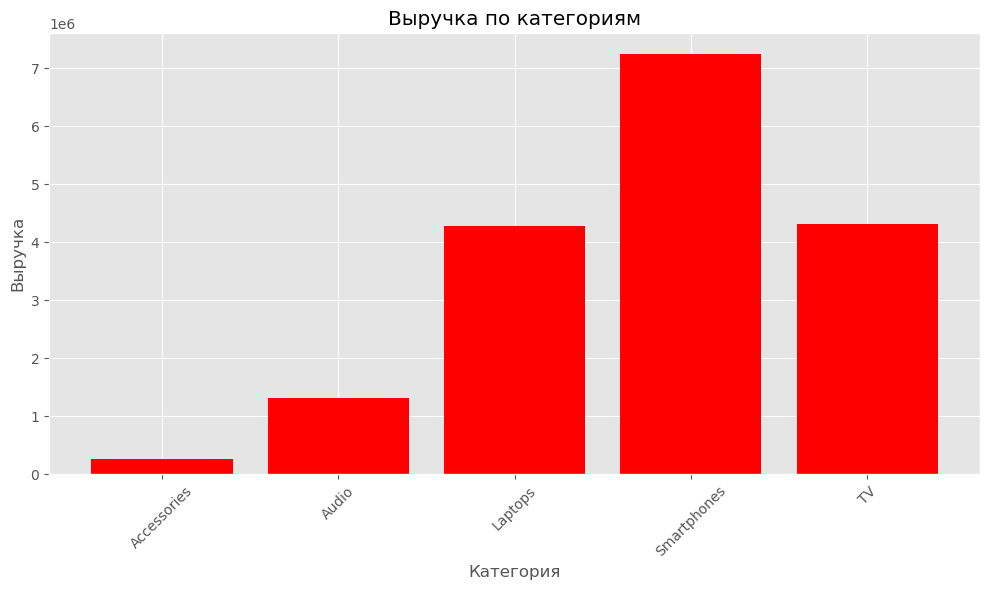

In [25]:
# Визуализация динамики продаж по месяцам
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', color='darkblue')
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(monthly_revenue['Month'])
plt.grid()
plt.tight_layout()
plt.show()

# Визуализация выручки по категориям
plt.figure(figsize=(10, 6))
plt.bar(category_revenue['Category'], category_revenue['Revenue'], color='red')
plt.title('Выручка по категориям')
plt.xlabel('Категория')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# 8. Выводы
total_units_sold = sales_df['Quantity'].sum()
total_revenue = sales_df['Revenue'].sum()
most_popular_category = category_revenue.loc[category_revenue['Revenue'].idxmax(), 'Category']
best_selling_product = top_products.iloc[0]['Product']

print(f"Общие продажи: {total_units_sold} единиц товара")
print(f"Общая выручка: ${total_revenue:,.2f}")
print(f"Самая популярная категория: {most_popular_category}")
print(f"Самый продаваемый товар: {best_selling_product}")

# Рекомендации
recommendations = [
    f" 1. Увеличить ассортимент в категории {most_popular_category} как самой популярной.",
    f" 2. Увеличить складские запасы {best_selling_product} для предотвращения дефицита."
]

print("\nРекомендации:")
for recommendation in recommendations:
    print(recommendation)

Общие продажи: 631 единиц товара
Общая выручка: $17,415,040.00
Самая популярная категория: Smartphones
Самый продаваемый товар: USB-C Cable

Рекомендации:
 1. Увеличить ассортимент в категории Smartphones как самой популярной.
 2. Увеличить складские запасы USB-C Cable для предотвращения дефицита.
